########## PIMA DATASET DESCRIPTION ###################################
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
## The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on measurements collected for diagnostic purposes.

# References

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/

#I. Data Dictionary and description of attributes of the PIMA dataset

1. Pregnancies - Number of times pregnant

2. Glucose - Plasma glucose concentration - 2 hours in an oral glucose tolerance test

3. BloodPressure - Diastolic blood pressure (mm Hg)

4. SkinThickness - Triceps skin fold thickness (mm)

5. Insulin - 2-Hour serum insulin (mu U/ml)

6. BMI - Body mass index

7. DiabetesPedigreeFunction - Diabetes pedigree function

8. Age - Age (years)

9. Outcome - Class variable (0 or 1)


######### PIMA DATASET DESCRIPTION ###############

The following code cell creates a feature layer containing eight features measured to predict onset of diabetes:

When building a model with multiple features, a common practice is to normalize the data so that the values of each feature are of approximately the same magnitude. For example, normalizing all features to have mean 0 and standard deviation of 1. Normalizing the features helps the model learn better and converge faster.

In [42]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

plots_dir = r'/content/gdrive/MyDrive/Colab Notebooks/plots'

if not os.path.exists(plots_dir):
    os.mkdir(plots_dir)

################################### Plot curves ########################################
def plot_the_acc_curve(epochs, train_acc, val_acc):
  """Plot a curve of acc vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  plt.plot(np.arange(0,epochs), train_acc, label="Accuracy")
  plt.plot(np.arange(0,epochs), val_acc, label="val_Accuracy")
  
  plt.legend()
  plt.ylim([train_acc.min()*0.5, train_acc.max() * 1.03])
  #plt.show()
  plt.savefig(os.path.join(plots_dir,'PIMA_ACC.png'), dpi=300)

def plot_the_loss_curve(epochs, train_loss, val_loss):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.plot(np.arange(0,epochs), train_loss, label="Loss")
  plt.plot(np.arange(0,epochs), val_loss, label="val_Loss")
  
  plt.legend()
  plt.ylim([train_loss.min(), train_loss.max() * 1.03])
  #plt.show()
  plt.savefig(os.path.join(plots_dir,'PIMA_Loss.png'), dpi=300)

################################### Plot curves ########################################

##load dataframe attributes from the csv file##########################################

columns = ['preg', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/csv/pima-indians-diabetes.csv', names=columns)
#print(df.dtypes)

df1 = df.copy()

Outcome = df.pop('Outcome')

numeric_features_names = ['preg', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'DPF', 'Age']
numeric_features = df[numeric_features_names]
numeric_features.head()

#convert the numeric values from the dataframe to a Tensor

tf.convert_to_tensor(numeric_features)




Mounted at /content/gdrive


<tf.Tensor: shape=(768, 8), dtype=float64, numpy=
array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])>

In [43]:
# Normalise the numeric features

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)
# first three rows
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
array([[ 0.6399474 ,  0.8483236 ,  0.14964077,  0.90727   , -0.69289064,
         0.20401227,  0.4684921 ,  1.4259953 ],
       [-0.84488505, -1.1233966 , -0.16054577,  0.5309016 , -0.69289064,
        -0.6844222 , -0.3650605 , -0.19067203],
       [ 1.2338804 ,  1.9437237 , -0.2639413 , -1.2882122 , -0.69289064,
        -1.1032559 ,  0.6043975 , -0.10558426]], dtype=float32)>

34.895833333333336 65.10416666666667
0    500
1    268
Name: Outcome, dtype: int64


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


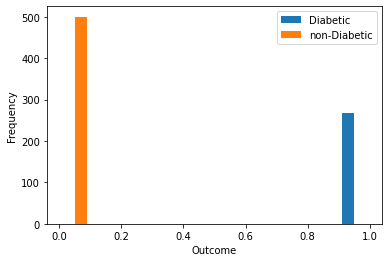

In [46]:
############## BMI Measurement variable ##############################
# Computing the percentage of diabetic and non-diabetic in the given dataset
Out_D = len(df1[df1.Outcome==1])
Out_ND = len(df1[df1.Outcome==0])
Total = Out_D+Out_ND
PC_of_D = Out_D*100/Total
PC_of_ND = Out_ND*100/Total

print(PC_of_D, PC_of_ND)

########################################################################

######### Exploratory visualisation ###################################
print(df1.Outcome.value_counts())
plt.hist([df1.Outcome[df1.Outcome == 1],
          df1.Outcome[df1.Outcome == 0],
          ], label=['Diabetic', 'non-Diabetic'])
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.legend()
plt.show()
######### Exploratory visualisation ###################################

 Total dimension of features given to the model: (768, 8)
({'preg': <tf.Tensor: shape=(), dtype=int64, numpy=6>, 'Glucose': <tf.Tensor: shape=(), dtype=int64, numpy=148>, 'BP': <tf.Tensor: shape=(), dtype=int64, numpy=72>, 'ST': <tf.Tensor: shape=(), dtype=int64, numpy=35>, 'Insulin': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'BMI': <tf.Tensor: shape=(), dtype=float64, numpy=33.6>, 'DPF': <tf.Tensor: shape=(), dtype=float64, numpy=0.627>, 'Age': <tf.Tensor: shape=(), dtype=int64, numpy=50>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'preg': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'Glucose': <tf.Tensor: shape=(), dtype=int64, numpy=85>, 'BP': <tf.Tensor: shape=(), dtype=int64, numpy=66>, 'ST': <tf.Tensor: shape=(), dtype=int64, numpy=29>, 'Insulin': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'BMI': <tf.Tensor: shape=(), dtype=float64, numpy=26.6>, 'DPF': <tf.Tensor: shape=(), dtype=float64, numpy=0.351>, 'Age': <tf.Tensor: shape=(), dtype=int64, numpy=31>}, <tf.Tensor: sh

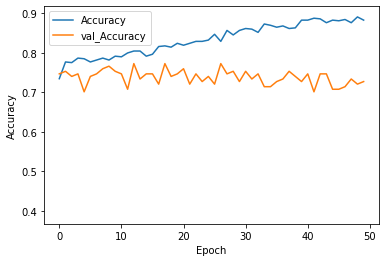

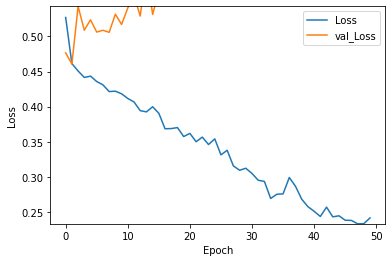

In [47]:

print(" Total dimension of features given to the model:", numeric_features.shape)

# # Convert the list of feature columns into a layer that will later be fed into
# # the model.

# #@title Define functions to create and train a classification model
def create_baseline_dense_model():
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential([
      normalizer,
      tf.keras.layers.Dense(units=16, activation='relu'),
      tf.keras.layers.Dense(units=8, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

  
  # Construct the layers into a model that TensorFlow can execute.
  my_learning_rate = 0.01
  # epochs = 20
  # batch_size = 100
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

# The following variables are the hyperparameters.
numeric_dataset = tf.data.Dataset.from_tensor_slices((dict(numeric_features), Outcome))

for row in numeric_dataset.take(2):
  print(row)


train_epochs=50
model = create_baseline_dense_model()
history = model.fit(numeric_features, Outcome, validation_split=0.2, epochs=train_epochs, batch_size=10, verbose=1)
hist = pd.DataFrame(history.history)
train_acc = hist["accuracy"]
val_acc = hist["val_accuracy"]

train_loss = hist["loss"]
val_loss = hist["val_loss"]
# 
plot_the_acc_curve(train_epochs, train_acc, val_acc)
plot_the_loss_curve(train_epochs, train_loss, val_loss)




# Experiment with Different Layer Sizes
Now experiment with at least 2 different combinations of layer sizes (or introduce more layers, or fewer layers). For example: build a five-hidden-layer network with hidden layer sizes (64, 32, 16, 8, 4) . Or a 1-hidden-layer network with size (20,). Compare the training loss and validation loss by plotting them using subplot. Similarly compare the training accuracy and validation accuracy. Report the overfitting and try to use L2 regularizers and dropout layers.